In [ ]:
Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
Create Image Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train))
print(x_train.shape) # (60000, 28, 28)
print(y_test.shape) # (60000,)
print(y_test[0:10])

<class 'numpy.ndarray'>
(60000, 28, 28)
(10000,)
[7 2 1 0 4 1 4 9 5 9]


In [ ]:
x_train = (x_train/ 255) - 0.5
x_test = (x_test/ 255) - 0.5

In [ ]:
Reshaping Images

In [ ]:
x_train=np.expand_dims(x_train, axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [ ]:
print(x_train.shape) # (60000, 28, 28,1)
print(x_test.shape) # (60000,)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [ ]:
Create A CNN network

In [ ]:
CNN=Sequential()

In [ ]:
ADD First layer: Convolution layer of 2D images

In [ ]:
CNN.add(Conv2D(filters=8, kernel_size=3, input_shape=[28, 28,1]))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
CNN.add(MaxPooling2D(pool_size=2))

In [ ]:
CNN.add(Flatten())

In [ ]:
CNN.add(Dropout(0.5))

In [ ]:
CNN.add(Dense(120,activation='relu'))

In [ ]:
CNN.add(Dense(10,activation='softmax'))

In [ ]:
CNN.compile(optimizer='adam',loss='crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical
CNN.fit(x_train,to_categorical(y_train),epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8443 - loss: 0.4991
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9564 - loss: 0.1373
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9671 - loss: 0.1066
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9726 - loss: 0.0866
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9760 - loss: 0.0740
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9777 - loss: 0.0645
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9809 - loss: 0.0592
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.9822 - loss: 0.0548
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9836 - loss: 0.0489
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9829 - loss: 0.0495
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9837 - loss: 0.0493
Epoch 12/

In [ ]:
predictions = CNN.predict(x_test)
print(predictions.shape)
print(y_test.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
(10000,)


In [ ]:
predicted_labels = tf.argmax(predictions,axis=1)
print(predicted_labels.shape)
print(predicted_labels)
print(y_test)

(10000,)
tf.Tensor([7 2 1 ... 4 5 6], shape=(10000,), dtype=int64)
[7 2 1 ... 4 5 6]


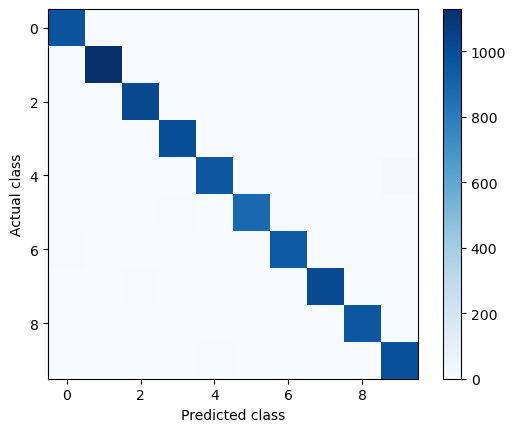

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()

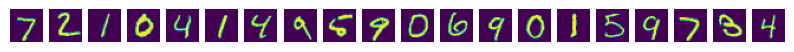

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
def print_images(x_test, num_images=20):
    """Prints a specified number of images from x_test."""

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[i])
        plt.axis("off")

    plt.show()

print_images(x_test)
print(y_test[0:20])

In [ ]:
CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │         162,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 490,952 (1.87 MB)

 Trainable params: 163,650 (639.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,302 (1.25 MB)

In [ ]:
CNN.save('CNN_edge.keras')
keras_model=tf.keras.models.load_model('CNN_edge.keras')

In [ ]:
import os
# Get file size in bytes for a given model
file_size_bytes=os.stat('CNN_edge.keras').st_size
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_mb=round(file_size_mb, 2)
print(str(file_size_mb) + " " + "MB")

1.9 MB


In [ ]:
#DynamicQUANTIZATION
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quant_model = converter.convert()
#Save the model in a .tffile
open("tflite_quant_model.tflite", "wb").write(tflite_quant_model)

#Reduced size of TFlite file
import os
# Get file size in bytes for a given model
file_size_bytes=os.stat('tflite_quant_model.tflite').st_size
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_mb=round(file_size_mb, 2)
print(str(file_size_mb) + " " + "MB")

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfjtm0_7u\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpfjtm0_7u\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmpfjtm0_7u'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1730130506960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730130509456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132148496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132157520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132150032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132156752: TensorSpec(shape=(), dtype=tf.resource, name=None)
0.16 MB


In [ ]:
#16bitfloatQUANTIZATION
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Converting the model.
tflite_fp16_model = converter.convert()

# Saving the model.
with open('fp_16_model.tflite', 'wb') as f:
  f.write(tflite_fp16_model)
#Reduced size of TFlite file
import os
# Get file size in bytes for a given model
file_size_bytes=os.stat('tflite_quant_model.tflite').st_size
file_size_mb = file_size_bytes / (1024 * 1024)
file_size_mb=round(file_size_mb, 2)
print(str(file_size_mb) + " " + "MB")

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6_qsmvyt\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmp6_qsmvyt\assets


Saved artifact at 'C:\Users\HP\AppData\Local\Temp\tmp6_qsmvyt'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1730130506960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730130509456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132148496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132157520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132150032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1730132156752: TensorSpec(shape=(), dtype=tf.resource, name=None)
0.16 MB


In [ ]:
print(tf.__version__)

2.18.0


In [ ]:
!pip install tensorflow_model_optimization.sparsity

ERROR: Could not find a version that satisfies the requirement tensorflow_model_optimization.sparsity (from versions: none)
ERROR: No matching distribution found for tensorflow_model_optimization.sparsity


In [ ]:
!python --version

Python 3.12.7


In [ ]:
! pip install tensorflow-model-optimization


In [ ]:
! pip install tf_keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 11.7 MB/s eta 0:00:00


In [ ]:
 import tensorflow_model_optimization as tfmot

In [ ]:
import tf_keras as keras
CNN_original=keras.Sequential([

    keras.layers.Conv2D(filters=8, kernel_size=3, input_shape=[28, 28,1]),

    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(120, activation='relu'),

    keras.layers.Dense(10, activation='softmax')

])

In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude


CNN_pruning = prune_low_magnitude(CNN_original)

# `prune_low_magnitude` requires a recompile.
CNN_pruning.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

CNN_pruning.summary()
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 26, 26, 8)         154       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_max_po  (None, 13, 13, 8)         1         
 oling2d (PruneLowMagnitude                                      
 )                                                               
                                                                 
 prune_low_magnitude_flatte  (None, 1352)              1         
 n (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dropou  (None, 1352)              1         
 t (PruneLowMagnitude)                                           
                                                      

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 120)                 │         162,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 490,952 (1.87 MB)

 Trainable params: 163,650 (639.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,302 (1.25 MB)

In [ ]:
if isinstance(CNN_original, Sequential):
    print("The model is a Sequential model.")
else:
    print("The model is not a Sequential model.")

The model is a Sequential model.
